Digital DNA
Model account behaviour by defining the following alphabet, of cardinality N = 3,

$B^3_{type} = {\{A, C, T\}}$

A $\leftarrow$ tweet,

C $\leftarrow$ reply,

T $\leftarrow$ retweet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
import sys
import time
import zlib

In [3]:
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

In [4]:
# load dataset
data_path = '/Users/anne/Desktop/capstone/TIMME/TIMME/data/'
data_set = 'PureP/'

# load all twitter ids
twitter_ids = pd.read_csv(data_path+data_set+'all_twitter_ids.csv')

# load ground truth - R_party or D_party
party_dict = pd.read_csv(data_path+data_set+'dict.csv',sep='\t')
R_party = party_dict[party_dict['party'] == 'R']
D_party = party_dict[party_dict['party'] == 'D']

In [5]:
from os.path import exists
# generate a digit DNA for each tweets file
def create_dna_from_tweets(twitter_id):
    path_to_file = data_path+'tweets/'+twitter_id+'.txt'
    file_exists = exists(path_to_file)
    if not file_exists:
        print(path_to_file,"does not exists")
        return ''
    tweets_file = pd.read_csv(path_to_file,sep='\n'
                              ,names=['twitter_id'],quoting=3,lineterminator='\n')
    
    dna = ''
    for index, row in tweets_file.itertuples():
        row = str(row)
        # retweet
        if row.startswith('RT'):
            dna += 'T'
        # reply
        elif row.startswith('@'):
            dna += 'C'
        # tweet
        else:
            dna += 'A'
    return dna

In [6]:
def compress_dna_df(dna):
    '''Return a dataframe with compression facts for a series of dna.'''

    # Convert DNA in string object to bytes object.
    dna_bytes = dna.apply(lambda s: s.encode('utf-8'))

    # Run compression on each DNA string in the sample.
    dna_compressed = dna_bytes.apply(lambda b: zlib.compress(b))

    # Create dataframe with compression facts.
    dna_df = pd.DataFrame({'original_dna_size': dna_bytes.apply(sys.getsizeof), 
                           'compressed_dna_size': dna_compressed.apply(sys.getsizeof)})
    
    dna_df['compression_ratio'] = dna_df['original_dna_size'] / dna_df['compressed_dna_size']
    
    return dna_df

In [7]:
#map dna to tweeter id
twitter_ids['dna'] = twitter_ids.apply(lambda x: create_dna_from_tweets(str(x['twitter_id'])),axis=1)

print(twitter_ids)

/Users/anne/Desktop/capstone/TIMME/TIMME/data/tweets/1635375612.txt does not exists
/Users/anne/Desktop/capstone/TIMME/TIMME/data/tweets/17896154.txt does not exists
/Users/anne/Desktop/capstone/TIMME/TIMME/data/tweets/148006729.txt does not exists
             twitter_id                                                dna
0    842072478834909184  AATAAAAATAAATAATTATTAAAAAAAAAAAAAAAAAAAAATAAAA...
1    888031054141022209  AAAAAAATATTAAAAAATTAAATAATTAAAAATAATAATTAAAAAT...
2    819992522109894658  ATTAAAATTTAAATATAAAAAAAAAAAAAAAATTTTTTTTTAAAAT...
3    956283913835614208  AAAATAAAAAAAAAAAAAAAAAAAAAAAATAAAAAATTATTTAAAT...
4    836305915452272641  AAAAAAAAAAAAAAAAACCAAAAAAAAAAATAAAAAAAAAAAAAAA...
..                  ...                                                ...
578          2964877294  CAAAAAAAAAAATATATAATAATATAAAATAATAATTTTAAAAAAA...
579           993153006  AAAAATTAAAAAAAAAAAAAAATTACAATACAACCAAAAAATAAAA...
580            16056306  AAAAAAAAAAATAATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...
5

In [8]:
# DNA for Republicans
R_dna = pd.merge(twitter_ids,R_party, on='twitter_id')

# DNA for Demoncrates
D_dna = pd.merge(twitter_ids,D_party, on='twitter_id')



In [9]:
# DNA string compression for Republicans
R_dna_compressed = compress_dna_df(R_dna['dna'])

# DNA string compression for Democrates
D_dna_compressed = compress_dna_df(D_dna['dna'])

print(R_dna_compressed)

     original_dna_size  compressed_dna_size  compression_ratio
0                 2404                  198          12.141414
1                   97                   62           1.564516
2                 2104                  390           5.394872
3                 1614                  336           4.803571
4                  372                   95           3.915789
..                 ...                  ...                ...
307               3255                  573           5.680628
308               1748                  356           4.910112
309               3250                  604           5.380795
310               2780                  323           8.606811
311               2971                  404           7.353960

[312 rows x 3 columns]


In [10]:
# combine those compressed with original
R_dna = pd.concat([R_dna,R_dna_compressed],axis=1)
D_dna = pd.concat([D_dna,D_dna_compressed],axis=1)

print(R_dna)
print(D_dna)

             twitter_id                                                dna  \
0    842072478834909184  AATAAAAATAAATAATTATTAAAAAAAAAAAAAAAAAAAAATAAAA...   
1    888031054141022209  AAAAAAATATTAAAAAATTAAATAATTAAAAATAATAATTAAAAAT...   
2    819992522109894658  ATTAAAATTTAAATATAAAAAAAAAAAAAAAATTTTTTTTTAAAAT...   
3    956283913835614208  AAAATAAAAAAAAAAAAAAAAAAAAAAAATAAAAAATTATTTAAAT...   
4    836305915452272641  AAAAAAAAAAAAAAAAACCAAAAAAAAAAATAAAAAAAAAAAAAAA...   
..                  ...                                                ...   
307            22509548  AAATAAATAATAAAAATAATTAAATATATATTATATAAAATTTAAT...   
308          2964877294  CAAAAAAAAAAATATATAATAATATAAAATAATAATTTTAAAAAAA...   
309           993153006  AAAAATTAAAAAAAAAAAAAAATTACAATACAACCAAAAAATAAAA...   
310            16056306  AAAAAAAAAAATAATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...   
311          2955485182  AAAAAATAAAAAAAAAAAAAAAAATAAAAAAATAAAAAAAAAAAAA...   

                    name     twitter_name party  original_dna_s

In [11]:
np.random.seed(2601)

results_with_length_1 = []
results_with_ratio_1 = []

num_republicans = list(range(1, 21))
num_humans = 100

for _ in range(100):
    for n in num_bots:
        bot_dna_test = ss1_dna_test1.sample(2*n)
        gen_dna_test = gen_dna_test1.sample(2*num_humans)
        
        ##### original dna size + compressed dna size
        X_train = pd.concat([gen_dna_test[['original_dna_size', 'compressed_dna_size']].head(num_humans),
                             bot_dna_test[['original_dna_size', 'compressed_dna_size']].head(n)])
        X_test = pd.concat([gen_dna_test[['original_dna_size', 'compressed_dna_size']].tail(num_humans),
                            bot_dna_test[['original_dna_size', 'compressed_dna_size']].tail(n)])

        y_train = pd.concat([gen_dna_test.loc[:, 'label'].head(num_humans), 
                             bot_dna_test.loc[:, 'label'].head(n)])
        y_test = pd.concat([gen_dna_test.loc[:, 'label'].tail(num_humans), 
                             bot_dna_test.loc[:, 'label'].tail(n)])

        # Logistic Regression classifier with default parameters.
        classifier = LogisticRegression()

        # Train the classifier.
        classifier.fit(X_train, y_train)

        # Make predictions on the test set.
        predictions = classifier.predict(X_test)

        # Evaluation on the test set.
        tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
        specificity = tn / (tn+fp)
        
        res = dict()
        res['Accuracy'] = accuracy_score(y_test, predictions)
        res['Precision'] = precision_score(y_test, predictions)
        res['Recall'] = recall_score(y_test, predictions)
        res['F1 Score'] = f1_score(y_test, predictions)
        res['Specificity'] = specificity
        res['MCC'] = matthews_corrcoef(y_test, predictions)
        res['Proportion'] = n / num_humans

        results_with_length_1.append(res.copy())

        
        ##### original dna size + compression ratio
        X_train = pd.concat([gen_dna_test[['original_dna_size', 'compression_ratio']].head(num_humans),
                             bot_dna_test[['original_dna_size', 'compression_ratio']].head(n)])
        X_test = pd.concat([gen_dna_test[['original_dna_size', 'compression_ratio']].tail(num_humans),
                            bot_dna_test[['original_dna_size', 'compression_ratio']].tail(n)])

        y_train = pd.concat([gen_dna_test.loc[:, 'label'].head(num_humans), 
                             bot_dna_test.loc[:, 'label'].head(n)])
        y_test = pd.concat([gen_dna_test.loc[:, 'label'].tail(num_humans), 
                             bot_dna_test.loc[:, 'label'].tail(n)])

        # Logistic Regression classifier with default parameters.
        classifier = LogisticRegression()

        # Train the classifier.
        classifier.fit(X_train, y_train)

        # Make predictions on the test set.
        predictions = classifier.predict(X_test)

        # Evaluation on the test set.
        
        tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
        specificity = tn / (tn+fp)
        
        res = dict()
        res['Accuracy'] = accuracy_score(y_test, predictions)
        res['Precision'] = precision_score(y_test, predictions)
        res['Recall'] = recall_score(y_test, predictions)
        res['F1 Score'] = f1_score(y_test, predictions)
        res['Specificity'] = specificity
        res['MCC'] = matthews_corrcoef(y_test, predictions)
        res['Proportion'] = n / num_humans

        results_with_ratio_1.append(res.copy())
        

results_with_length_1 = pd.DataFrame(results_with_length_1)
results_with_length_1 = results_with_length_1.groupby(['Proportion']).mean().reset_index()

results_with_ratio_1 = pd.DataFrame(results_with_ratio_1)
results_with_ratio_1 = results_with_ratio_1.groupby(['Proportion']).mean().reset_index()

NameError: name 'num_bots' is not defined

#### Visualise compression facts for accounts.

In [12]:
# Combine all samples into a single dataframe.
all_dna = pd.concat([R_dna, D_dna])

In [13]:
all_dna.sample(5)

,twitter_id,dna,name,twitter_name,party,original_dna_size,compressed_dna_size,compression_ratio
131,1065995022,ATTAAAAAAATTAATTAATTAAAAAAATTTAAAAAAAATAAAAAAA...,"Walorski, Jackie",RepWalorski,R,3258,546,5.967033
91,818910970567344128,ATTTATATTTAAAATTTTAAAAATTATTATTTTTAATTTTTAAAAA...,Michael R. Pence,VP,R,3236,564,5.737589
51,51228911,AATAATATAAAAAAAAAAATATTAAAAAAAAAAAAAAAAAAAAAAT...,"Turner, Michael R.",RepMikeTurner,R,2763,532,5.193609
29,291756142,AAAAATAAATAAAAAAAAATAATAATAAAAAAAAAATAAAAATAAA...,"Enzi, Michael B.",SenatorEnzi,R,3267,437,7.475973
197,821769014691168256,AAATTAATAAAAAAATAATTTTTATTAAAAAATTAAAAATAAATAA...,Ernest Moniz,ErnestMoniz,D,383,138,2.775362


##### Plot of Uncompressed DNA Size vs. Compressed DNA Size.

Includes the following accounts:
1. Republicans
1. Democrats


/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:806: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  func(*plot_args, **plot_kwargs)


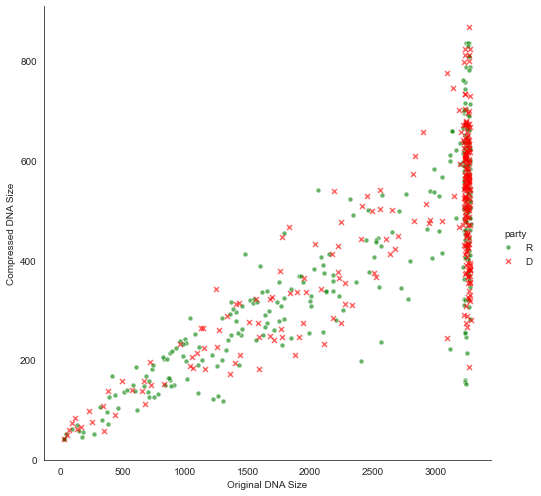

In [24]:
sns.set_style("white")

pal = {
    'R': 'green',
    'D': 'red'
}

g = sns.FacetGrid(all_dna, hue='party', palette=pal, size=7, hue_kws=dict(marker=["o", "x"]))
g.map(plt.scatter, "original_dna_size", "compressed_dna_size", s=25, alpha=0.6, edgecolor="white")
g.add_legend()
g.set_axis_labels('Original DNA Size', 'Compressed DNA Size')

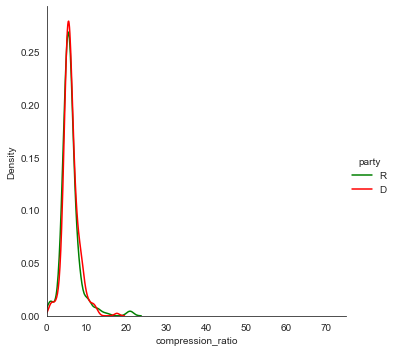

In [21]:
g = sns.FacetGrid(all_dna, hue='party', palette=pal, size=5)
g.set(xlim=(0, 75))
g.map(sns.kdeplot, 'compression_ratio')
g.add_legend()